Small Image Classification Using Convolutional Neural Network (CNN)




In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification








In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:]


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [16]:
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

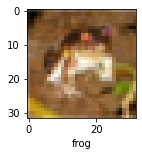

In [18]:
plot_sample(X_train, y_train, 0)

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8146 - accuracy: 0.3523
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.6253 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5426 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4839 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4335 - accuracy: 0.4958


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.50      0.55      1000
           1       0.65      0.50      0.57      1000
           2       0.41      0.28      0.33      1000
           3       0.31      0.50      0.38      1000
           4       0.60      0.16      0.26      1000
           5       0.52      0.25      0.33      1000
           6       0.38      0.76      0.51      1000
           7       0.64      0.44      0.52      1000
           8       0.70      0.49      0.58      1000
           9       0.39      0.76      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.45     10000
weighted avg       0.52      0.46      0.45     10000



In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4651 - accuracy: 0.4723
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1052 - accuracy: 0.6129
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9839 - accuracy: 0.6584
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9017 - accuracy: 0.6867
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8433 - accuracy: 0.7078
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7878 - accuracy: 0.7264
Epoch 7/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7347 - accuracy: 0.7446
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6965 - accuracy: 0.7565
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6538 - accuracy: 0.7709
Epoch 10/10
1563/1563 [==============================] - 49s 31m

In [28]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.82      0.73      1000
           1       0.69      0.89      0.78      1000
           2       0.57      0.61      0.59      1000
           3       0.53      0.47      0.50      1000
           4       0.70      0.57      0.63      1000
           5       0.61      0.58      0.60      1000
           6       0.82      0.70      0.75      1000
           7       0.68      0.79      0.73      1000
           8       0.84      0.77      0.80      1000
           9       0.82      0.67      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

